### Задание

Взять датасет из google диска: https://drive.google.com/file/d/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_. 
Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [16]:
import pandas as pd
import numpy as np

from statsmodels.stats import proportion
import matplotlib.pyplot as plt

1) user_id: идентификатор пользователя

2) date_served: дата события

3) marketing_channel: рекламный канал

4) variant: показанный вариант рекламы

5) converted: конверсия в покупку, 1 - пользователь совершил покупку, 0 - нет

6) language_displayed: язык рекламного сообщения

In [17]:
data = pd.read_csv("marketing_campaign.csv")
data

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True
10033,a11033,1/17/18,Email,control,German,True
10034,a11034,1/5/18,Instagram,control,German,False
10035,a11035,1/17/18,Email,control,German,True


Гипотеза:

нулевая гипотеза: $H_0 : p_1 = p_2$<br>
альтернативная гипотеза: $H_1 : p_1 \neq p_2$

In [18]:
data.variant.value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

In [19]:
data.converted.value_counts()

False    8946
True     1076
Name: converted, dtype: int64

In [20]:
data[data['variant'] == 'personalization'].describe()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
count,4946,4945,4946,4946,4946,4946
unique,4946,31,5,1,4,2
top,a10017,1/15/18,House Ads,personalization,English,False
freq,1,434,2181,4946,4863,4241


In [21]:
data[data['variant'] == 'control'].describe()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
count,5091,5076,5076,5091,5091,5076
unique,5091,31,5,1,4,2
top,a6348,1/15/18,House Ads,control,English,False
freq,1,355,2552,5091,4930,4705


In [22]:
data[data['variant'] == 'personalization'].converted.value_counts()

False    4241
True      705
Name: converted, dtype: int64

In [23]:
data[data['variant'] == 'control'].converted.value_counts()

False    4705
True      371
Name: converted, dtype: int64

In [24]:
k1 = data[data['variant'] == 'personalization']['converted'].sum()
n1 = data[data['variant'] == 'personalization'].shape[0]
k2 = data[data['variant'] == 'control']['converted'].sum()
n2 = data[data['variant'] == 'control'].shape[0]

k1, n1, k2, n2

(705, 4946, 371, 5091)

In [25]:
grouped = data.pivot_table(values='converted', index='variant', aggfunc=['sum', 'count'])
grouped

,sum,count
,converted,converted
variant,,
control,371,5076
personalization,705,4946


In [26]:
p1, p2 = k1/n1, k2/n2
p1, p2

(0.14253942579862516, 0.07287369868395208)

In [27]:
z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=11.279 pvalue=0.000


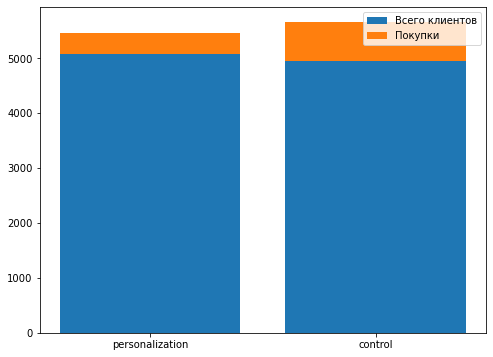

In [28]:
plt.figure(figsize=(8, 6))
plt.bar([1, 2], grouped['count']['converted'], label='Всего клиентов')
plt.bar([1, 2], grouped['sum']['converted'], bottom=grouped['count']['converted'], label='Покупки')
plt.xticks([1, 2], ['personalization', 'control'])
plt.legend();

Значение pvalue меньше 5%, соответственно нулевую гипотезу отклоняем. Т.е. в группах "personalization" и "control" конверсии отличаются, и в группе "personalization" она больше.